# Environment Setup

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 1.1.3
numpy : 1.19.2
matplotlib : 3.3.2
seaborn : 0.11.0
sklearn : 0.23.2
imblearn : 0.7.0


In [3]:
# Dataset field names
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
            
            
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
df_train = pd.read_csv("NSL_KDD_dataset/KDDTrain.txt", sep=",", names=datacols) 
df_train = df_train.iloc[:,:-1] # removes an unwanted extra field

# Load NSL_KDD test dataset
df_test = pd.read_csv("NSL_KDD_dataset/KDDTest.txt", sep=",", names=datacols)
df_test = df_test.iloc[:,:-1]

### Train Dataset

In [4]:
# View train data
df_train.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(df_train.shape[0], df_train.shape[1]))


Train set dimension: 125973 rows, 42 columns


### Test Dataset

In [6]:
# View train data
df_test.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan
5,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,3,0.0,0.00,0.0,0.0,1.00,0.00,1.00,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd
8,0,tcp,http,SF,327,467,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,33,47,0.0,0.00,0.0,0.0,1.00,0.00,0.04,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd


In [7]:
# test set dimension
print('Test set dimension: {} rows, {} columns'.format(df_test.shape[0], df_test.shape[1]))

Test set dimension: 22544 rows, 42 columns


In [8]:
df_train.attack.unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [9]:
df_train.attack.nunique()

23

### Data Preprocessing

In [10]:
mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe',
           'saint': 'Probe','mscan': 'Probe','teardrop': 'DoS','pod': 'DoS','land': 'DoS',
           'back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS','udpstorm': 'DoS',
           'apache2': 'DoS','processtable': 'DoS','perl': 'U2R','loadmodule': 'U2R',
           'rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
           'sqlattack': 'U2R','httptunnel': 'U2R','ftp_write': 'R2L','phf': 'R2L',
           'guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
           'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L',
           'snmpgetattack': 'R2L','xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
           'normal': 'Normal'
         }

In [11]:
# Apply attack class mappings to the dataset
df_train['attack_class'] = df_train['attack'].apply(lambda v: mapping[v])
df_test['attack_class'] = df_test['attack'].apply(lambda v: mapping[v])

In [12]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,DoS


In [13]:
# Drop attack field from both train and test data
df_train.drop(['attack'], axis=1, inplace=True)
df_test.drop(['attack'], axis=1, inplace=True)

### Exploratory Data Analysis

In [14]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,DoS
125969,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,Normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,Normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS


In [15]:
df_train['num_outbound_cmds'].value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [16]:
df_test['num_outbound_cmds'].value_counts()

0    22544
Name: num_outbound_cmds, dtype: int64

In [17]:
# 'num_outbound_cmds' field has all 0 values. Hence, it will be removed from both train and test dataset since it is a redundant field.'

df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [18]:
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,DoS
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal


In [19]:
# Attack Class Distribution
attack_class_freq_train= df_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test= df_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train/ attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


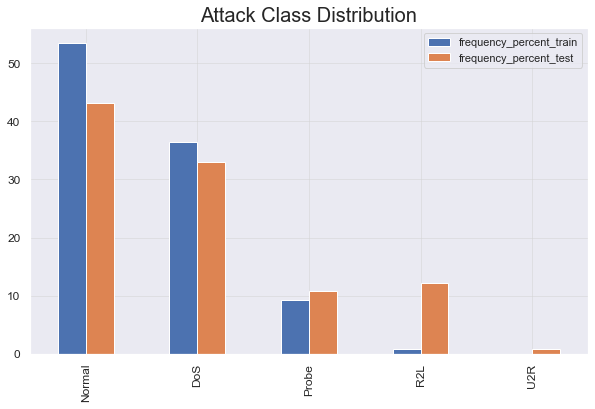

In [20]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar",figsize=(10,6));
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

### Scaling Numeric Attributes

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [22]:
sc_traindf.head(10)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387
5,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.322182,-0.120298,-0.637209,-0.631929,2.746403,2.715365,-1.139453,-0.016930,-0.374560,0.734343,-0.873089,-1.005110,-0.068553,-0.480197,-0.289103,-0.639532,-0.624871,2.874410,2.753914
6,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.715167,-0.257971,1.602664,1.605104,-0.374362,-0.374432,-1.389669,-0.016930,-0.374560,0.734343,-0.963422,-1.071933,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
7,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.287250,-0.161600,1.602664,1.605104,-0.374362,-0.374432,-1.184947,-0.016930,-0.374560,0.734343,-0.909222,-1.027384,-0.068553,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
8,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,1.623399,-0.065228,1.602664,1.605104,-0.374362,-0.374432,-1.298681,-0.072389,-0.374560,0.734343,-0.836956,-0.960561,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387
9,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.0412

In [23]:
sc_traindf.shape

(125973, 37)

### Encoding of Categorical Attributes

In [24]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()


In [25]:
cattrain

,protocol_type,service,flag,attack_class
0,tcp,ftp_data,SF,Normal
1,udp,other,SF,Normal
2,tcp,private,S0,DoS
3,tcp,http,SF,Normal
4,tcp,http,SF,Normal
...,...,...,...,...
125968,tcp,private,S0,DoS
125969,udp,private,SF,Normal
125970,tcp,smtp,SF,Normal
125971,tcp,klogin,S0,DoS


In [26]:
# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

In [27]:
traincat

,protocol_type,service,flag,attack_class
0,1,20,9,1
1,2,44,9,1
2,1,49,5,0
3,1,24,9,1
4,1,24,9,1
...,...,...,...,...
125968,1,49,5,0
125969,2,49,9,1
125970,1,54,9,1
125971,1,30,5,0


In [28]:
# separate target column from encoded data 
enctrain = traincat.drop(['attack_class'], axis=1)
enctest = testcat.drop(['attack_class'], axis=1)

In [29]:
enctrain

,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9
...,...,...,...
125968,1,49,5
125969,2,49,9
125970,1,54,9
125971,1,30,5


In [30]:
cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

In [31]:
cat_Ytrain

,attack_class
0,1
1,1
2,0
3,1
4,1
...,...
125968,0
125969,1
125970,1
125971,0


### Data Sampling

In [32]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

# define columns and extract encoded train set for sampling 
sc_traindf = df_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values),axis=1)
X = refclass
c= cat_Ytrain.values.shape[0]
y = cat_Ytrain.values.reshape(c,)
c= cat_Ytest.values.shape[0]
y_test = cat_Ytest.values.reshape(c,)

In [33]:
# apply the random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))
#what is the use of ros

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


### Feature Selection

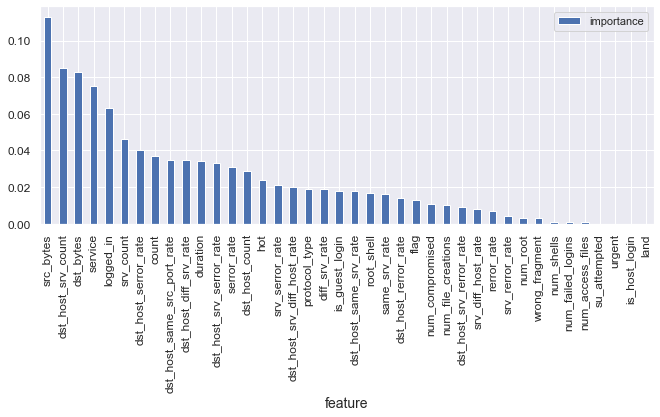

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(X_res, y_res);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':refclasscol,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [35]:
importances

,importance
feature,
src_bytes,0.113
dst_host_srv_count,0.085
dst_bytes,0.083
service,0.075
logged_in,0.063
srv_count,0.046
dst_host_serror_rate,0.040
count,0.037
dst_host_same_src_port_rate,0.035


In [36]:
from sklearn.feature_selection import RFE#recursive feature elimination
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_res, y_res)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), refclasscol)]
selected_features = [v for i, v in feature_map if i==True]

In [37]:
feature_map

[(False, 'duration'),
 (True, 'src_bytes'),
 (True, 'dst_bytes'),
 (False, 'land'),
 (False, 'wrong_fragment'),
 (False, 'urgent'),
 (False, 'hot'),
 (False, 'num_failed_logins'),
 (True, 'logged_in'),
 (False, 'num_compromised'),
 (False, 'root_shell'),
 (False, 'su_attempted'),
 (False, 'num_root'),
 (False, 'num_file_creations'),
 (False, 'num_shells'),
 (False, 'num_access_files'),
 (False, 'is_host_login'),
 (False, 'is_guest_login'),
 (True, 'count'),
 (True, 'srv_count'),
 (False, 'serror_rate'),
 (False, 'srv_serror_rate'),
 (False, 'rerror_rate'),
 (False, 'srv_rerror_rate'),
 (False, 'same_srv_rate'),
 (False, 'diff_srv_rate'),
 (False, 'srv_diff_host_rate'),
 (False, 'dst_host_count'),
 (True, 'dst_host_srv_count'),
 (False, 'dst_host_same_srv_rate'),
 (True, 'dst_host_diff_srv_rate'),
 (True, 'dst_host_same_src_port_rate'),
 (False, 'dst_host_srv_diff_host_rate'),
 (True, 'dst_host_serror_rate'),
 (False, 'dst_host_srv_serror_rate'),
 (False, 'dst_host_rerror_rate'),
 (Fals

In [38]:
selected_features

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'service']

### Dataset  Partition

In [39]:
# define columns to new dataframe
newcol = list(refclasscol)
newcol.append('attack_class')
newcol

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'service',
 'flag',
 'attack_class']

In [40]:
# add a dimension to target
new_y_res = y_res[:, np.newaxis]
new_y_res

array([[1],
       [1],
       [0],
       ...,
       [4],
       [4],
       [4]])

In [41]:
# create a dataframe from sampled data
res_arr = np.concatenate((X_res, new_y_res), axis=1)
res_df = pd.DataFrame(res_arr, columns = newcol) 
res_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1.0,20.0,9.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2.0,44.0,9.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1.0,24.0,9.0,1.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,24.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-0.110249,-0.007762,-0.003517,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,0.071872,-0.036652,-0.024437,0.069584,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.825991,-0.674358,1.066401,-0.439078,2.756092,0.599285,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,4.0
336711,-0.042674,-0.007497,-0.004239,-0.014089,-0.089486,-0.007736,1.300299,-0.027023,1.235694,0.155407,27.283738,-0.024437,-0.012385,2.040221,-0.01861,-0.041221,-0.002817,-0.097531,-0.725778,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.755431,-0.972455,1.066401,-0.439078,-0.091842,-0.289103,-0.639532,-0.624871,0.003811,-0.000751,1.0,60.0,9.0,4.0
336712,-0.110249,-0.007762,-0.003469,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.026180,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.815911,-1.026654,1.066401,-0.439078,2.756092,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,20.0,9.0,4.0
336713,-0.110249,-0.007762,-0.004403,-0.014089,-0.089486,-0.007736,0.370049,-0.027023,1.235694,-0.011664,27.283738,-0.024437,-0.012385,-0.026180,-0.01861,

In [42]:
# create test dataframe
reftest = pd.concat([sc_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)
reftest

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.347390,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.347390,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1.0,19.0,9.0,1.0
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,0.380366,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,3.557193,-2.029801,-0.749234,0.898090,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0.0,13.0,9.0,2.0
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.259648,-0.348468,0.054856,1.830141,0.636275,0.629488,-0.363035,2.571154,-1.753304,-0.489800,-0.685647,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1.0,55.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1.0,49.0,9.0,1.0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.599273,-0.225963,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.322985,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1.0,22.0,9.0,1.0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.575933,-0.237191,-0.348468,-0.347390,-0.573079,-0.565054,0.629488,-0.363035,0.401869,0.650093,1.022079,0.898090,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,1.0,22.0,9.0,0.0
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,

In [43]:
from collections import defaultdict
classdict = defaultdict(list)

In [44]:
# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = res_df.loc[(res_df['attack_class'] == k) | (res_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()

In [45]:
for k, v in classdict.items():
    print(k)

Normal_DoS
Normal_Probe
Normal_R2L
Normal_U2R


In [46]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'

In [47]:
pretrain

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.717045,-0.354343,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-0.324063,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,1.0,20.0,9.0,1.0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.620982,-0.368110,-0.637209,-0.631929,-0.374362,-0.374432,-1.321428,0.482201,-0.374560,0.734343,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,2.0,44.0,9.0,1.0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.339648,-0.299273,1.602664,1.605104,-0.374362,-0.374432,-1.389669,0.038529,-0.374560,0.734343,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,49.0,5.0,0.0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.690846,-0.313041,-0.189235,-0.184522,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,-1.533670,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,1.0,24.0,9.0,1.0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,-0.472521,0.058678,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.028179,0.734343,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,1.0,24.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147384,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,0.514308,-0.202902,1.602664,1.605104,-0.374362,-0.374432,-1.298681,-0.016930,-0.374560,0.734343,-0.927289,-1.049659,-0.068553,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,41.0,5.0,0.0
147385,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,1.116885,-0.216669,1.602664,1.605104,-0.374362,-0.374432,-1.366922,-0.072389,-0.374560,0.734343,-0.936322,-1.049659,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,1.0,29.0,5.0,0.0
147386,-0.110249,-0.007586,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041221,-0.002817,-0.097531,3.728053,6.653245,-0.637209,-0.631929,-0.374362,-0.374432,0.771283,-0.349683,-0.374560,0.734343,-0.584026,-0.715544,-0.227350,0.167061,-0.289103,-0.144908,-0.624871,-0.322394,-0.376387,0.0,15.0,9.0,0.0
147387,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,-0.024437,-0.012385,-0.02618,-0.01861,-0.041

In [48]:
pretest

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,attack_class
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,1.166764,-0.237191,-0.348468,-0.34739,1.830141,1.837604,-1.697859,-0.131492,-0.386963,0.650093,-1.169697,-1.305370,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,0.443234,-0.338246,-0.348468,-0.34739,1.830141,1.837604,-1.770589,-0.131492,-0.386963,0.650093,-1.250212,-1.397181,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1.0,45.0,1.0,0.0
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.636681,-0.489800,0.002934,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1.0,19.0,9.0,1.0
5,-0.155534,-0.021423,0.587166,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.583713,-0.304561,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.413357,1.022079,0.898090,-0.410217,-0.399204,0.121341,-0.321505,-0.35275,-0.602719,-0.565483,1.0,22.0,9.0,1.0
6,-0.155534,-0.019826,-0.078657,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.315789,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,3.557193,0.650093,-1.008669,-1.144701,2.851953,-0.431856,-0.229980,-0.358118,-0.35275,1.256688,-0.465699,1.0,49.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,-0.155534,-0.019805,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.202498,0.245626,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,0.650093,1.022079,0.898090,-0.410217,2.833328,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,0.0,14.0,9.0,0.0
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.607053,-0.338246,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,-0.386963,-0.998254,0.002232,0.255414,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1.0,49.0,9.0,1.0
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171071,-0.599273,-0.225963,-0.348468,-0.34739,-0.573079,-0.565054,0.629488,-0.363035,0.322985,0.033292,1.022079,0.898090,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1.0,22.0,9.0,1.0
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,-0.049453,-0.012638,-0.014259,-0.012911,-0.02402,-0.052318,-0.022095,-0.171

### Finalize data preprocessing for training

In [49]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

Xresdf = pretrain 
newtest = pretest

In [50]:
Xresdfnew = Xresdf[selected_features]
Xresdfnum = Xresdfnew.drop(['service'], axis=1)#without service column
Xresdfcat = Xresdfnew[['service']].copy()#only service column

In [51]:
Xtest_features = newtest[selected_features]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

In [52]:
# Fit train data
enc.fit(Xresdfcat)

# Transform train data
X_train_1hotenc = enc.transform(Xresdfcat).toarray()

# Fit test data
enc.fit(Xtestcat)

# Transform test data
X_test_1hotenc = enc.transform(Xtestcat).toarray()

In [53]:
X_test_1hotenc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

In [56]:
extra=np.zeros(dtype=int,shape=(17169,2))

In [57]:
X_test=np.concatenate((X_test,extra),axis=1)

In [58]:
#extra=np.zeros(dtype=int,shape=(17169,2))

In [59]:
y_train = Xresdf[['attack_class']].copy()
c= y_train.values.shape[0]
Y_train = y_train.values.reshape(c,)

In [60]:
y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)

## Train Models

In [61]:
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train);
            
# Train SVM Model
SVC_Classifier = SVC(random_state=0)
SVC_Classifier.fit(X_train, Y_train)


SVC(random_state=0)

## Evaluate Models

In [62]:
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    predicted=v.predict(X_train)
    accuracy = metrics.accuracy_score(Y_train, predicted)
    confusion_matrix = metrics.confusion_matrix(Y_train, predicted)
    classification = metrics.classification_report(Y_train, predicted)
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Normal_DoS SVM Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9885066028376592

Model Accuracy:
 0.9891376980532498

Confusion matrix:
 [[66345   998]
 [  465 66878]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     67343
         1.0       0.99      0.99      0.99     67343

    accuracy                           0.99    134686
   macro avg       0.99      0.99      0.99    134686
weighted avg       0.99      0.99      0.99    134686



============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9997698368976862

Model Accuracy:
 0.9999480272634127

Confusion matrix:
 [[67343     0]
 [    7 67336]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     67343
         1.0   

## Test Models

In [63]:
for i, v in models:
    predicted=v.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, predicted)
    confusion_matrix = metrics.confusion_matrix(Y_test, predicted)
    classification = metrics.classification_report(Y_test, predicted)
    print()
    print('============================== {} {} Model Test Results =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()        



============================== Normal_DoS SVM Classifier Model Test Results ==============================

Model Accuracy:
 0.8775117945133671

Confusion matrix:
 [[5681 1777]
 [ 326 9385]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.95      0.76      0.84      7458
         1.0       0.84      0.97      0.90      9711

    accuracy                           0.88     17169
   macro avg       0.89      0.86      0.87     17169
weighted avg       0.89      0.88      0.88     17169



============================== Normal_DoS Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.815830857941639

Confusion matrix:
 [[5591 1867]
 [1295 8416]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.75      0.78      7458
         1.0       0.82      0.87      0.84      9711

    accuracy                           0.82     17169
   macro av

In [64]:
##Example

In [1]:
input1 = list(X_train[0])
input2 = list(X_train[25])
input3 = list(X_train[170])
input4 = list(X_train[43])
input5 = list(X_train[985])

NameError: name 'X_train' is not defined

In [99]:
input6 = []
input6.append(input4)
print(input6)
output = v.predict(input6)

[[-0.007718801792368665, -0.004704532026408358, 1.2356940323701657, -0.3502593814756196, 0.22388639475686778, 1.2587542737799418, -0.43907816809041417, -0.4801968475158174, -0.6395319051152512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [100]:
if output[0] == 0 :
    print ("NO Attack")
else:
    print("Attack Found")


Attack Found


In [1]:
import os
The os. getcwd()


SyntaxError: invalid syntax (<ipython-input-1-3d84d182db10>, line 2)

In [3]:
import os
os.getcwd()

'C:\\Users\\panka'